 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Set csv paths

whale_path = Path('whale_returns.csv')
algo_path = Path('algo_returns.csv')
sp500_path = Path('sp500_history.csv')


In [3]:
# Read csv data

whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True)
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True)
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, date_format='%d-%b-%y')


# Sort Whale Returns DataFrame
whale_df = whale_df.sort_values(by='Date')

# Sort Algorithmic Returns DataFrame
algo_df = algo_df.sort_values(by='Date')

# Sort S&P 500 History DataFrame
sp500_df = sp500_df.sort_values(by='Date')

# Display the first few rows of each DataFrame

display(whale_df.head())
display(algo_df.head())
display(sp500_df.head())



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns

whale_path = Path('whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True)
whale_df.head()





,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls

whale_df.isnull().sum ()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:

# Drop nulls
whale_df = whale_df.dropna()

# Drop duplicates
whale_df = whale_df.drop_duplicates()

# Validate no more missing values
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns

algo_path = Path('algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df = algo_df.dropna()

# Drop duplicates
algo_df = algo_df.drop_duplicates()

# Validate no more missing values
algo_df.isnull().sum()



Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices

sp500_path = Path('sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, date_format='%d-%b-%y')
sp500_df.head()



,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [37]:
# Calculate Daily Returns 

# Load the data and fix data types
sp500_path = Path('sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, parse_dates=True, index_col='Date', thousands=',', dtype={'Close': str}).sort_index()

#Convert 'Close' column to numeric

sp500_df['Close'] = sp500_df['Close'].replace('[\$,]', '', regex=True).astype(float)

# Calculate Daily Returns
sp500_daily_return = sp500_df.pct_change()


# Display the updated DataFrame
display(sp500_daily_return.head())
display(sp500_daily_return.tail())






/var/folders/72/jrk85kms6q7_78yj5r80dnkw0000gn/T/ipykernel_5380/3398731375.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_path, parse_dates=True, index_col='Date', thousands=',', dtype={'Close': str}).sort_index()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


,Close
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [12]:
# Rename `Close` Column to be specific to this portfolio. 

sp500_df = sp500_df.rename(columns={'Close': 'S&P 500 Close'})
sp500_df.head()


,S&P 500 Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


## Combine Whale, Algorithmic, and S&P 500 Returns

In [44]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df, sp500_daily_return], axis='columns', join='inner')

combined_df = combined_df.dropna()
combined_df.head()

# Drop 'S&P 500 Close' column
combined_df = combined_df.drop(columns=['Close'])

# Rename 'Daily Returns' column to 'S&P 500'
combined_df = combined_df.rename(columns={'Daily Returns': 'S&P 500'})
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

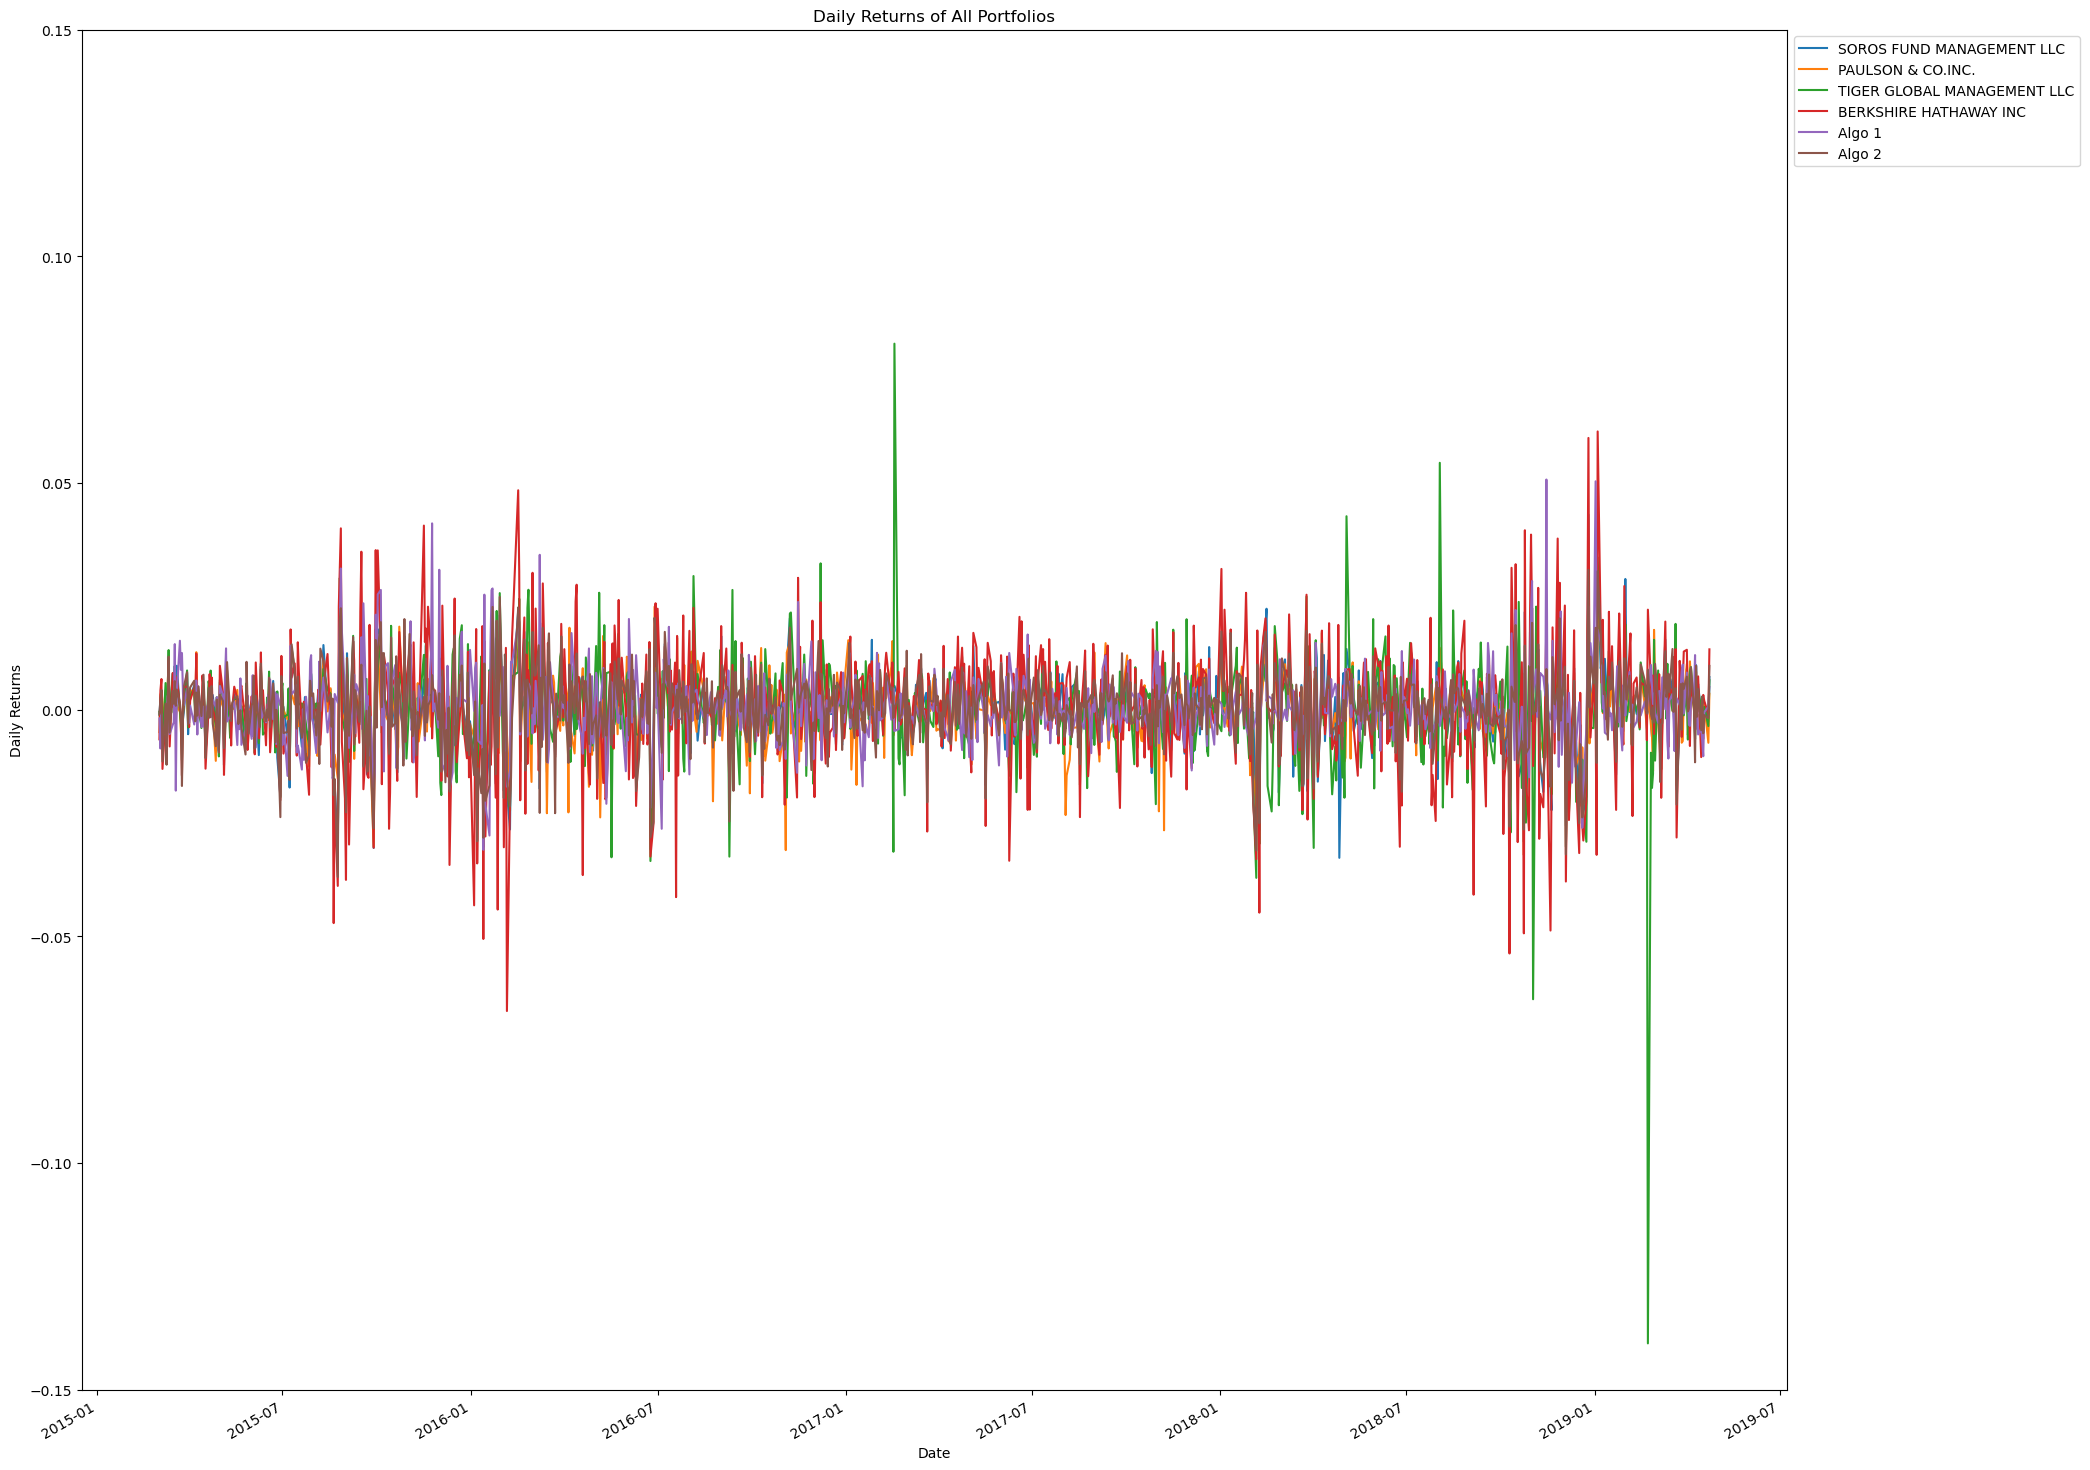

In [14]:
# Plot daily returns of all portfolios

combined_df.plot(figsize=(22, 20), title='Daily Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim([-0.15, 0.15])  
plt.show()


#### Calculate and Plot cumulative returns.

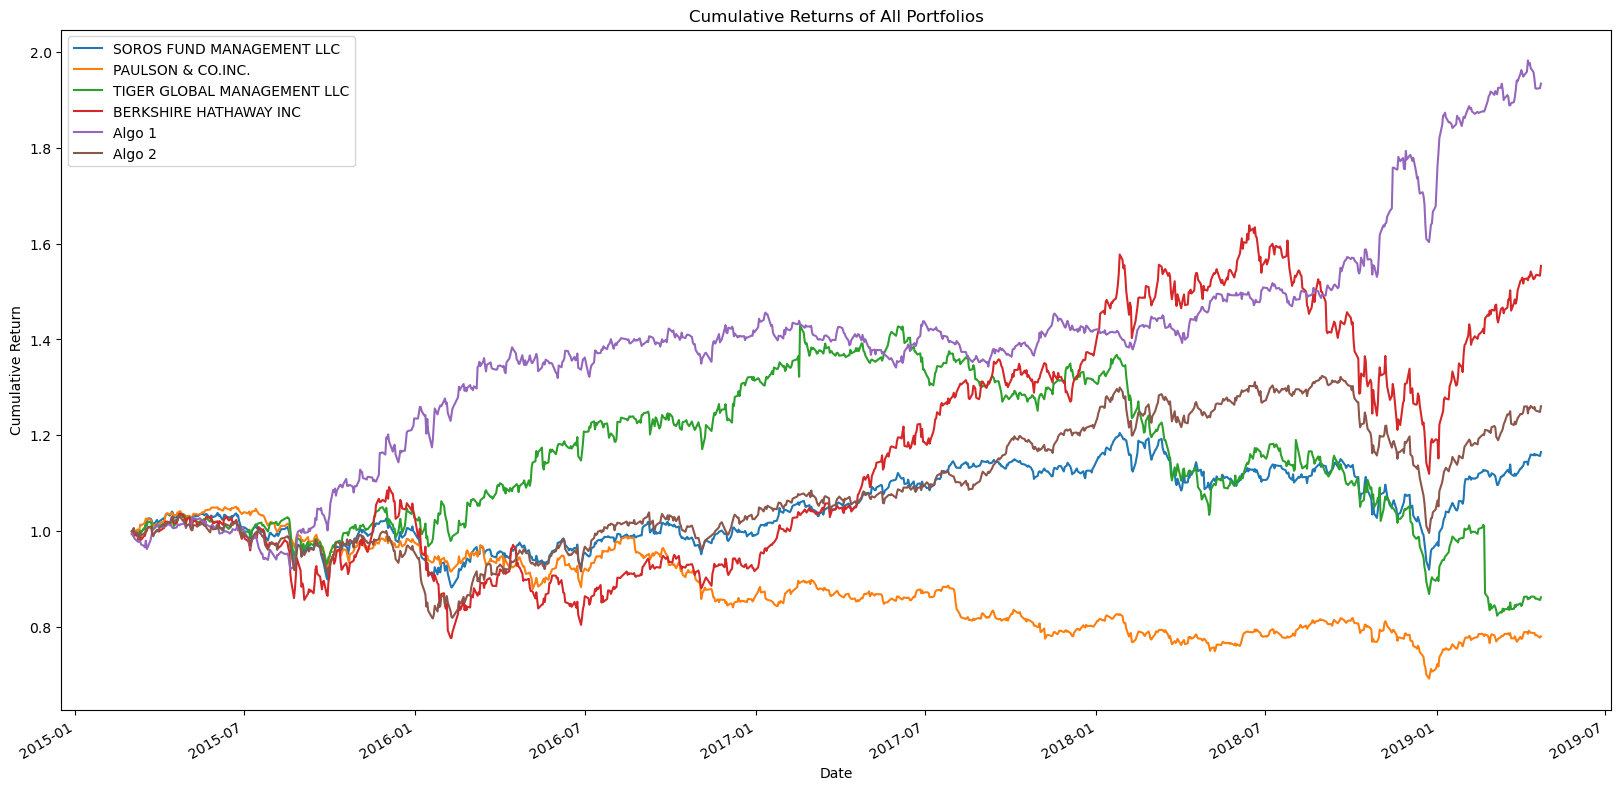

In [15]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title='Cumulative Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.show()



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


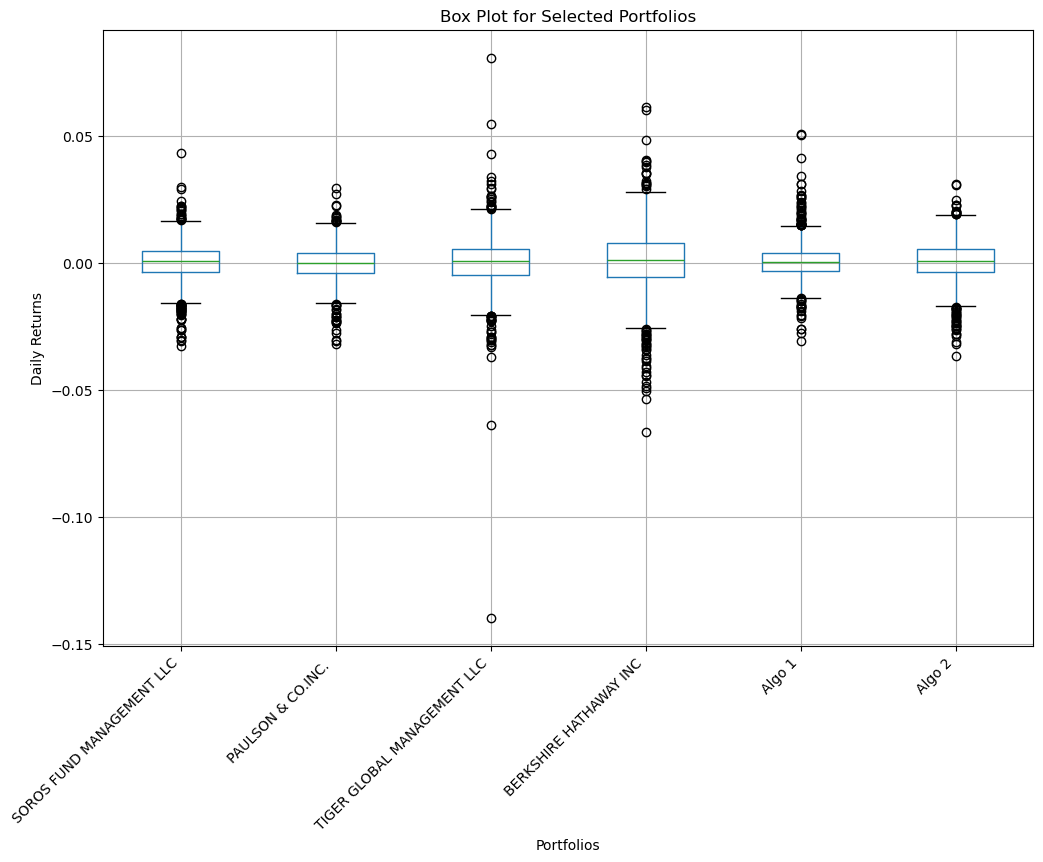

In [16]:
# Box plot to visually show risk

# Create a box plot for selected portfolios with rotated x-axis labels
selected_portfolios = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2']

plt.figure(figsize=(12, 8))
combined_df[selected_portfolios].boxplot()
plt.title('Box Plot for Selected Portfolios')
plt.xlabel('Portfolios')
plt.ylabel('Daily Returns')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.show()






### Calculate Standard Deviations

In [17]:
# Calculate the daily standard deviations of all portfolios

daily_std = combined_df.std()
daily_std.head()


SOROS FUND MANAGEMENT LLC      0.008004
PAULSON & CO.INC.              0.007119
TIGER GLOBAL MANAGEMENT LLC    0.011043
BERKSHIRE HATHAWAY INC         0.013095
Algo 1                         0.007671
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [18]:
# Calculate  the daily standard deviation of S&P 500

sp500_daily_std = sp500_df.std()
sp500_daily_std.head()


S&P 500 Close    402.122004
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500

daily_std = combined_df.std().sort_values(ascending=False)
daily_std.head()


BERKSHIRE HATHAWAY INC         0.013095
TIGER GLOBAL MANAGEMENT LLC    0.011043
Algo 2                         0.008316
SOROS FUND MANAGEMENT LLC      0.008004
Algo 1                         0.007671
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.207884
TIGER GLOBAL MANAGEMENT LLC    0.175308
Algo 2                         0.132007
SOROS FUND MANAGEMENT LLC      0.127053
Algo 1                         0.121780
PAULSON & CO.INC.              0.113015
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

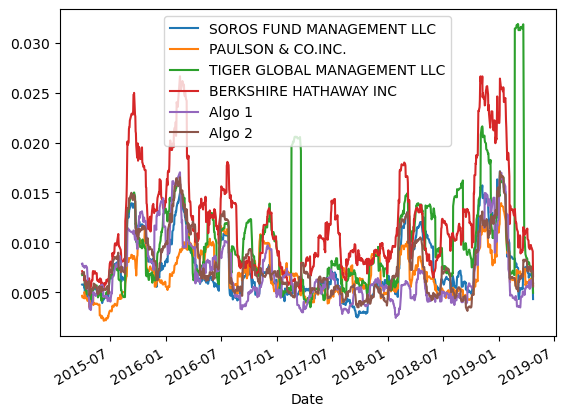

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_df.rolling(window=21).std().plot()

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [22]:
# Calculate the correlation

correlation = combined_df.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699947,0.561252,0.754357,0.323391,0.840901
PAULSON & CO.INC.,0.699947,1.000000,0.434479,0.545674,0.270781,0.689656
TIGER GLOBAL MANAGEMENT LLC,0.561252,0.434479,1.000000,0.424441,0.165546,0.516017
BERKSHIRE HATHAWAY INC,0.754357,0.545674,0.424441,1.000000,0.293975,0.699768
Algo 1,0.323391,0.270781,0.165546,0.293975,1.000000,0.286012
Algo 2,0.840901,0.689656,0.516017,0.699768,0.286012,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [23]:
# Calculate covariance of a single portfolio

covariance = daily_returns['PAULSON & CO.INC'].cov(daily_returns['S&P 500'])
covariance

# Calculate covariance of S&P 500

covariance_sp500 = daily_returns['S&P 500'].cov(daily_returns['S&P 500'])
covariance_sp500

# Calculate variance of S&P 500
variance_sp500 = daily_returns['S&P 500'].var()
variance

# Calculate beta
beta = covariance / variance
print(f'Beta for PAULSON & CO.INC. with respect to S&P 500: {beta}')


# Calculate 60-day rolling covariance of PAULSON & CO.INC. vs. S&P 500 and plot the data

rolling_covariance = portfolio_returns.rolling(window=60).cov(market_returns)
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of PAULSON & CO.INC. vs. S&P 500 Returns')
plt.show()



NameError: name 'daily_returns' is not defined

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window

portfolio_returns = combined_df['PAULSON & CO.INC. ']
market_returns = combined_df['S&P 500']

# Calculate the 21-day exponentially weighted moving average for standard deviation
portfolio_ewm_std = portfolio_returns.ewm(span=21, min_periods=0, adjust=False).std()
market_ewm_std = market_returns.ewm(span=21, min_periods=0, adjust=False).std()

# Print or use the resulting DataFrames portfolio_ewm_std and market_ewm_std
print("Portfolio EWMA Std:")
print(portfolio_ewm_std.head())

print("\nMarket EWMA Std:")
print(market_ewm_std.head())

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:

# Assuming 'PAULSON & CO.INC.' and 'S&P 500' are the columns for daily returns
portfolio_returns = combined_df['PAULSON & CO.INC. ']
market_returns = combined_df['S&P 500']

# Replace 'your_risk_free_rate' with the actual numerical value for the risk-free rate
risk_free_rate = 0.02  

# Replace 0.02 with your risk-free rate

# Calculate daily excess returns
portfolio_excess_returns = portfolio_returns - risk_free_rate
market_excess_returns = market_returns - risk_free_rate

# Calculate average daily excess returns
average_portfolio_excess_return = portfolio_excess_returns.mean()
average_market_excess_return = market_excess_returns.mean()

# Calculate standard deviation of daily excess returns
std_portfolio_excess_return = portfolio_excess_returns.std()
std_market_excess_return = market_excess_returns.std()

# Calculate Sharpe ratios
sharpe_ratio_portfolio = average_portfolio_excess_return / std_portfolio_excess_return
sharpe_ratio_market = average_market_excess_return / std_market_excess_return

# Plot Sharpe ratios
labels = ['Portfolio', 'S&P 500']
sharpe_ratios = [sharpe_ratio_portfolio, sharpe_ratio_market]

plt.bar(labels, sharpe_ratios, color=['blue', 'green'])
plt.title('Sharpe Ratios - PAULSON & CO.INC. vs. S&P 500')
plt.ylabel('Sharpe Ratio')
plt.show()




In [ ]:
# Visualize the sharpe ratios as a bar plot


In [ ]:
algo_df = combined_df[['Algo 1', 'Algo 2']].sum(axis=1)
sp500_df = combined_df['S&P 500']
whale_df = combined_df[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']].sum(axis=1)

# Calculate cumulative returns

cumulative_algo_df = (1 + algo_df).cumprod()
cumulative_sp500_df = (1 + sp500_df).cumprod()
cumulative_whale_df = (1 + whale_df).cumprod()

# Plot cumulative returns

plt.figure(figsize=(15, 8))
plt.plot(cumulative_algo_returns, label='Algorithmic Strategies')
plt.plot(cumulative_sp500_returns, label='S&P 500')
plt.plot(cumulative_whale_returns, label='Whale Portfolios')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithmic strategies cumative returns has been growing in comparision withe the market and the whales.It means a total gain in an investment over a specified period. In general, positive algorithmic returns are considered a positive outcome, as they indicate that the algorithmic trading strategy generated a profit over a specific period. Positive returns suggest that the strategy's buy and sell signals or trading decisions resulted in gains for the portfolio.

Altough, in reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. While analying the three portfolios, SP500 has a lower shaper ratio, which means a lower risk of investment.

-----

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [24]:
# Reading data from 1st stock

# Set csv paths

bbd_path= ('bbd_history.csv')
bbd_df = pd.read_csv(bbd_path, index_col="Date",parse_dates=True)


In [25]:
# Reading data from 2nd stock

# Set csv paths

itub_path = Path('itub_history.csv')
itub_df = pd.read_csv(itub_path, index_col="Date", parse_dates=True)

In [26]:
# Reading data from 3rd stock

# Set csv paths

pbr_path = Path('pbr_history.csv')
pbr_df = pd.read_csv(pbr_path, index_col="Date", parse_dates=True)

# Display a few rows

pbr_df.head()


,Close
Date,
2015-03-03 16:00:00,6.41
2015-03-04 16:00:00,6.18
2015-03-05 16:00:00,6.08
2015-03-06 16:00:00,5.96
2015-03-09 16:00:00,5.59


In [27]:
# Combine all stocks in a single DataFrame

combined_df_stocks = pd.concat([bbd_df, itub_df, pbr_df], axis="columns", join="inner")

# Set column names

combined_df_stocks.columns = ['BBD', 'ITUB', 'PBR']

# Display the first few rows of each DataFrame

combined_df_stocks.head()


#print(sp500_df.head())

,BBD,ITUB,PBR
Date,,,
2015-03-03 16:00:00,4.99,5.69,6.41
2015-03-04 16:00:00,4.78,5.57,6.18
2015-03-05 16:00:00,4.71,5.40,6.08
2015-03-06 16:00:00,4.57,5.15,5.96
2015-03-09 16:00:00,4.33,4.93,5.59


In [28]:
# Reset Date index

df_reset_bbd = bbd_df.reset_index()
df_reset_itu = itub_df.reset_index()
df_reset_pbr = pbr_df.reset_index()



In [30]:
# Calculate daily returns

daily_returns_portfolios = combined_df_stocks.pct_change()

# Drop NAs

daily_returns_portfolios = daily_returns_portfolios.dropna()

# Display sample data

daily_returns_portfolios.head()

,BBD,ITUB,PBR
Date,,,
2015-03-04 16:00:00,-0.042084,-0.021090,-0.035881
2015-03-05 16:00:00,-0.014644,-0.030521,-0.016181
2015-03-06 16:00:00,-0.029724,-0.046296,-0.019737
2015-03-09 16:00:00,-0.052516,-0.042718,-0.062081
2015-03-10 16:00:00,-0.023095,-0.032454,-0.051878


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [31]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns_portfolios.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2015-03-04 16:00:00   -0.033018
2015-03-05 16:00:00   -0.020449
2015-03-06 16:00:00   -0.031919
2015-03-09 16:00:00   -0.052438
2015-03-10 16:00:00   -0.035809
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame

#joined_df = combined_df_stocks.join(daily_returns_portfolios, rsuffix='_daily_returns_portfolios')

joined_df = daily_returns_portfolios.join(combined_df_stocks, rsuffix='_close_prices')
joined_df.head()

,BBD,ITUB,PBR,BBD_close_prices,ITUB_close_prices,PBR_close_prices
Date,,,,,,
2015-03-04 16:00:00,-0.042084,-0.021090,-0.035881,4.78,5.57,6.18
2015-03-05 16:00:00,-0.014644,-0.030521,-0.016181,4.71,5.40,6.08
2015-03-06 16:00:00,-0.029724,-0.046296,-0.019737,4.57,5.15,5.96
2015-03-09 16:00:00,-0.052516,-0.042718,-0.062081,4.33,4.93,5.59
2015-03-10 16:00:00,-0.023095,-0.032454,-0.051878,4.23,4.77,5.30


In [33]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df = joined_df.dropna()
joined_df.head()


,BBD,ITUB,PBR,BBD_stock_prices,ITUB_stock_prices,PBR_stock_prices
Date,,,,,,
2015-03-04 16:00:00,-0.042084,-0.021090,-0.035881,4.78,5.57,6.18
2015-03-05 16:00:00,-0.014644,-0.030521,-0.016181,4.71,5.40,6.08
2015-03-06 16:00:00,-0.029724,-0.046296,-0.019737,4.57,5.15,5.96
2015-03-09 16:00:00,-0.052516,-0.042718,-0.062081,4.33,4.93,5.59
2015-03-10 16:00:00,-0.023095,-0.032454,-0.051878,4.23,4.77,5.30


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`

volatility = daily_returns_portfolios.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

combined_df_stocks.rolling(window=21).std().plot()

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation

correlation = combined_df_stocks.corr().plot()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


#rolling_beta = rolling_covariance / rolling_variance

# Calculate Covariance of portfolios returns vs. S&P 500 returns



# Calculate Variance of S&P 500 returns

#variance = daily_returns['S&P 500'].var()
#variance





### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!